# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

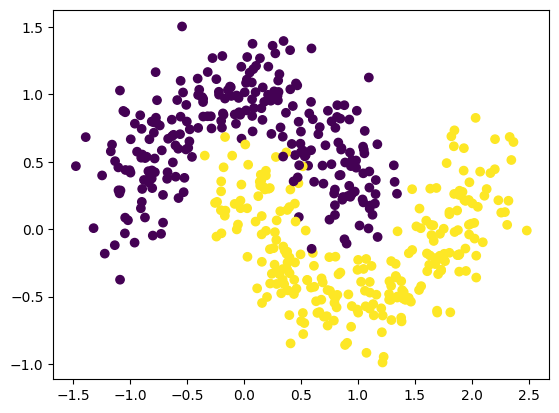

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

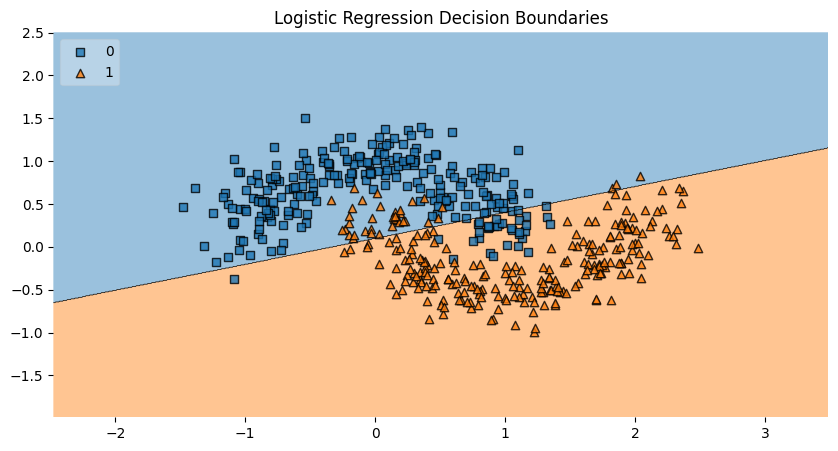

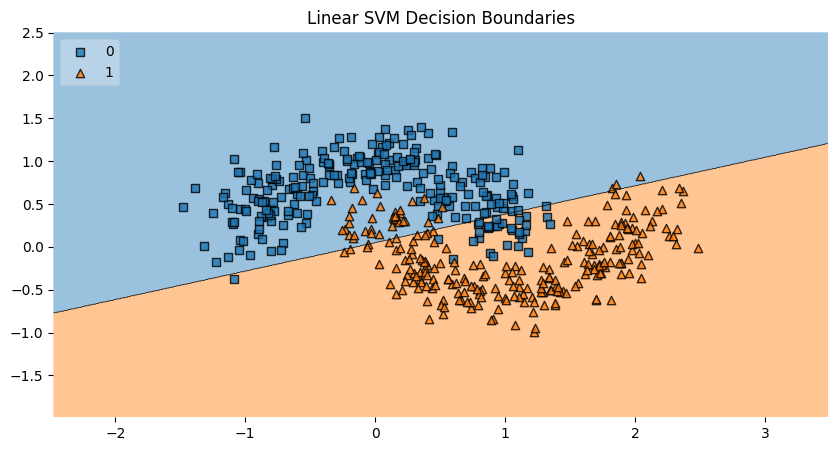

Logistic Regression Accuracy: 0.856
Linear SVM Accuracy: 0.858


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np

lr = LogisticRegression(C=1.0, random_state=42)
svm = SVC(kernel='linear', C=1.0, random_state=42)

lr.fit(moons_points, moons_labels)
svm.fit(moons_points, moons_labels)

# Функция для визуализации решающих границ
def plot_decisions(X, y, estimator, title):
    plt.figure(figsize=(10, 5))
    plot_decision_regions(X, y, clf=estimator, legend=2)
    plt.title(title)
    plt.show()

# Визуализация для Logistic Regression
plot_decisions(moons_points, moons_labels, lr, "Logistic Regression Decision Boundaries")

# Визуализация для линейного SVM
plot_decisions(moons_points, moons_labels, svm, "Linear SVM Decision Boundaries")

# Вычисляем точность
lr_accuracy = accuracy_score(moons_labels, lr.predict(moons_points))
svm_accuracy = accuracy_score(moons_labels, svm.predict(moons_points))

print(f"Logistic Regression Accuracy: {lr_accuracy:.3f}")
print(f"Linear SVM Accuracy: {svm_accuracy:.3f}")

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

Testing different SVM kernels:


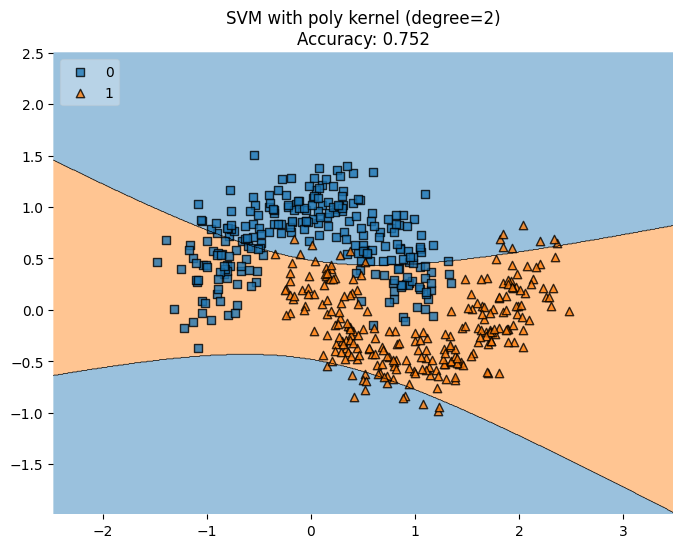

SVM with poly kernel (degree=2): Accuracy = 0.752


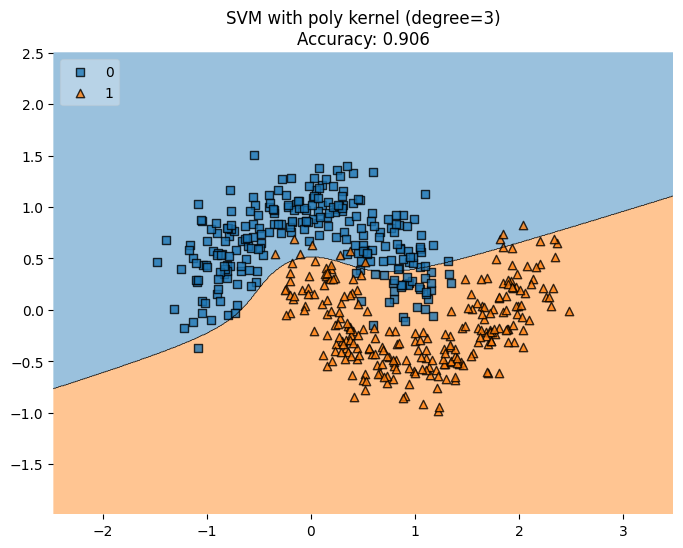

SVM with poly kernel (degree=3): Accuracy = 0.906


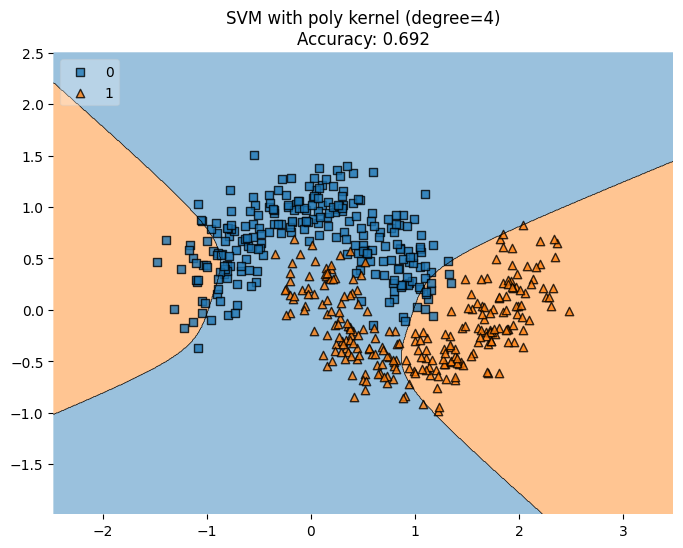

SVM with poly kernel (degree=4): Accuracy = 0.692
------------------------------


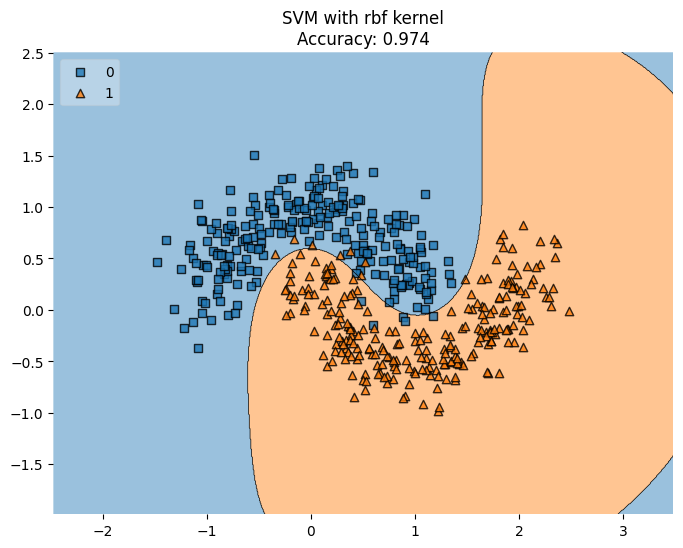

SVM with rbf kernel: Accuracy = 0.974
------------------------------


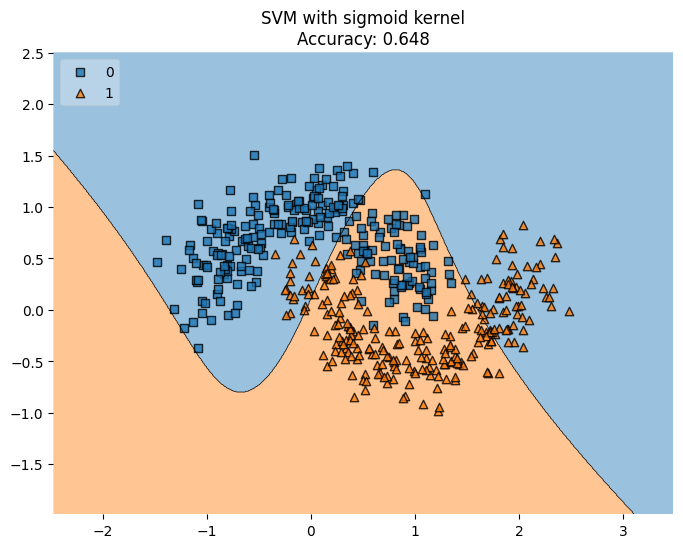

SVM with sigmoid kernel: Accuracy = 0.648
------------------------------

АНАЛИЗ РЕЗУЛЬТАТОВ:
• Полиномиальное ядро с degree=3 - хороший компромисс (0.906)
• degree=4 приводит к переобучению или недостаточной гибкости - точность 0.692
• RBF ядро показало наилучшую точность (0.974) - идеально для нелинейных данных
• Сигмоидное ядро не подходит для данной задачи - 0.648


In [16]:
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(X, y, estimator):
    y_pred = estimator.predict(X)
    return accuracy_score(y, y_pred)

def plot_decisions(X, y, estimator, title):
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X, y, clf=estimator, legend=2)
    plt.title(title)
    plt.show()

kernels = ['poly', 'rbf', 'sigmoid']
degrees = [2, 3, 4]

results = {}

print("Testing different SVM kernels:")
print("=" * 50)

for kernel in kernels:
    if kernel == 'poly':
        results[kernel] = {}
        for degree in degrees:
            svm = SVC(kernel=kernel, degree=degree, C=1.0, gamma='scale', random_state=42)
            svm.fit(moons_points, moons_labels)
            acc = evaluate_model(moons_points, moons_labels, svm)
            results[kernel][degree] = acc
            plot_decisions(moons_points, moons_labels, svm,
                         f"SVM with {kernel} kernel (degree={degree})\nAccuracy: {acc:.3f}")
            print(f"SVM with {kernel} kernel (degree={degree}): Accuracy = {acc:.3f}")
    else:
        svm = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
        svm.fit(moons_points, moons_labels)
        acc = evaluate_model(moons_points, moons_labels, svm)
        results[kernel] = acc
        plot_decisions(moons_points, moons_labels, svm,
                     f"SVM with {kernel} kernel\nAccuracy: {acc:.3f}")
        print(f"SVM with {kernel} kernel: Accuracy = {acc:.3f}")
    print("-" * 30)

print("\nАНАЛИЗ РЕЗУЛЬТАТОВ:")

if 'poly' in results:
    best_degree = max(results['poly'], key=results['poly'].get)
    worst_degree = min(results['poly'], key=results['poly'].get)
    print(f"• Полиномиальное ядро с degree={best_degree} - хороший компромисс ({results['poly'][best_degree]:.3f})")
    print(f"• degree={worst_degree} приводит к переобучению или недостаточной гибкости - точность {results['poly'][worst_degree]:.3f}")

if 'rbf' in results:
    print(f"• RBF ядро показало наилучшую точность ({results['rbf']:.3f}) - идеально для нелинейных данных")

if 'sigmoid' in results:
    print(f"• Сигмоидное ядро не подходит для данной задачи - {results['sigmoid']:.3f}")

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

Testing Logistic Regression with Polynomial Features:


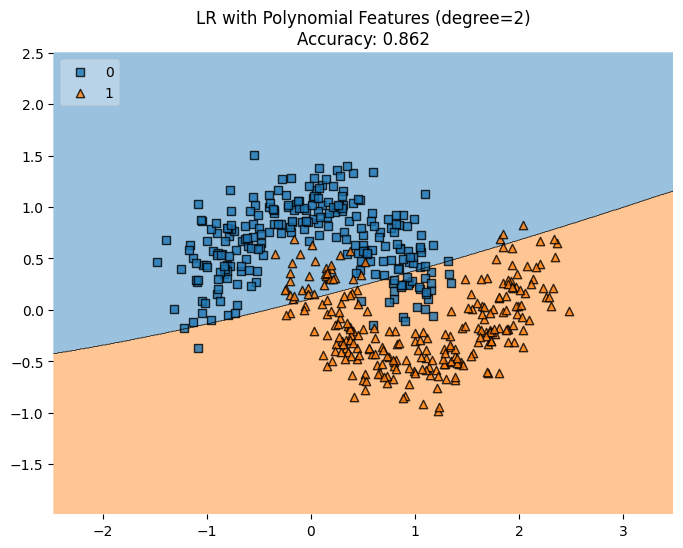

Accuracy for Polynomial Features (degree=2): 0.862
------------------------------


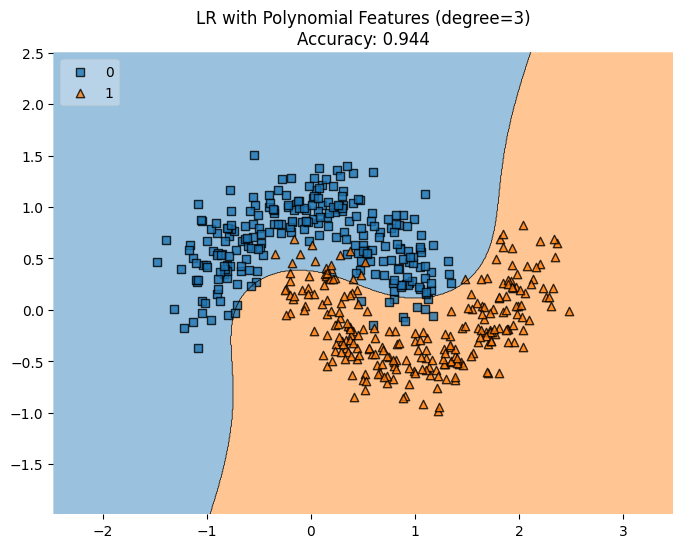

Accuracy for Polynomial Features (degree=3): 0.944
------------------------------


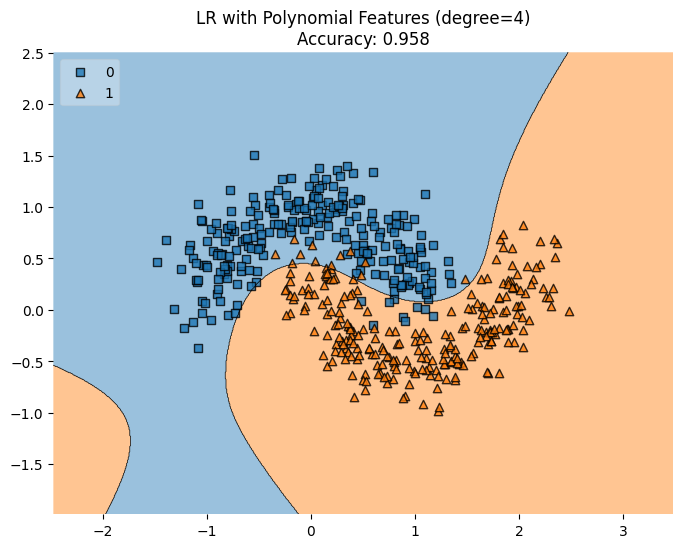

Accuracy for Polynomial Features (degree=4): 0.958
------------------------------


In [18]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(X, y, estimator):
    y_pred = estimator.predict(X)
    return accuracy_score(y, y_pred)

def plot_decisions(X, y, estimator, title):
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X, y, clf=estimator, legend=2)
    plt.title(title)
    plt.show()

poly_degrees = [2, 3, 4]

print("Testing Logistic Regression with Polynomial Features:")
print("=" * 50)

for degree in poly_degrees:
    poly_model = make_pipeline(
        PolynomialFeatures(degree),
        StandardScaler(),
        LogisticRegression(C=1.0, random_state=42, max_iter=1000)
    )
    poly_model.fit(moons_points, moons_labels)
    acc = evaluate_model(moons_points, moons_labels, poly_model)
    plot_decisions(moons_points, moons_labels, poly_model,
                 f"LR with Polynomial Features (degree={degree})\nAccuracy: {acc:.3f}")
    print(f"Accuracy for Polynomial Features (degree={degree}): {acc:.3f}")
    print("-" * 30)

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

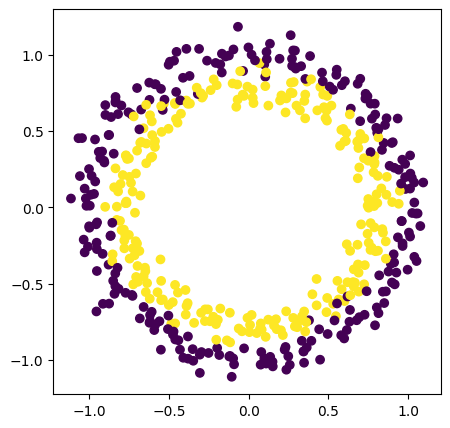

In [10]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

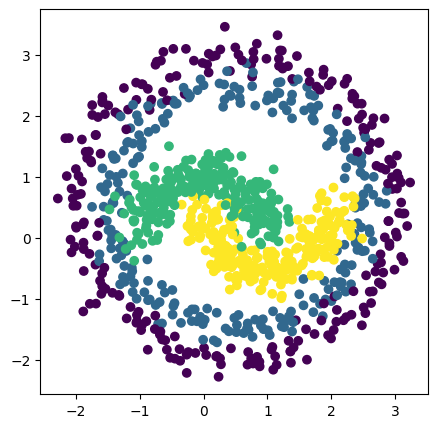

In [11]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

Testing models on complex dataset:


/usr/local/lib/python3.12/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


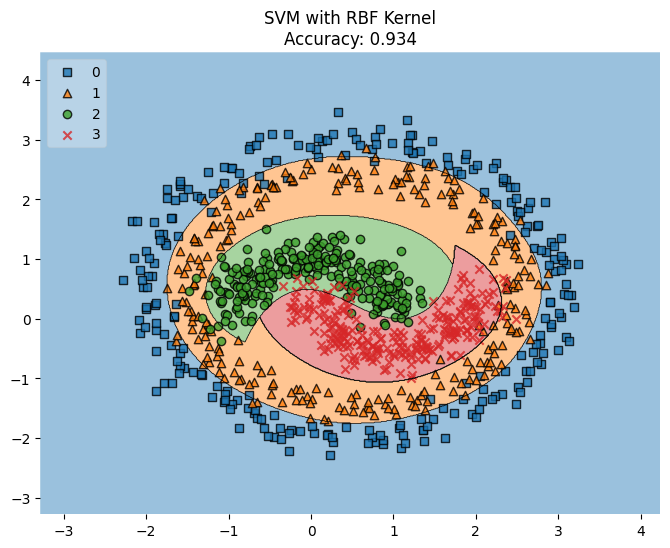

SVM with RBF Kernel: 0.934


/usr/local/lib/python3.12/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


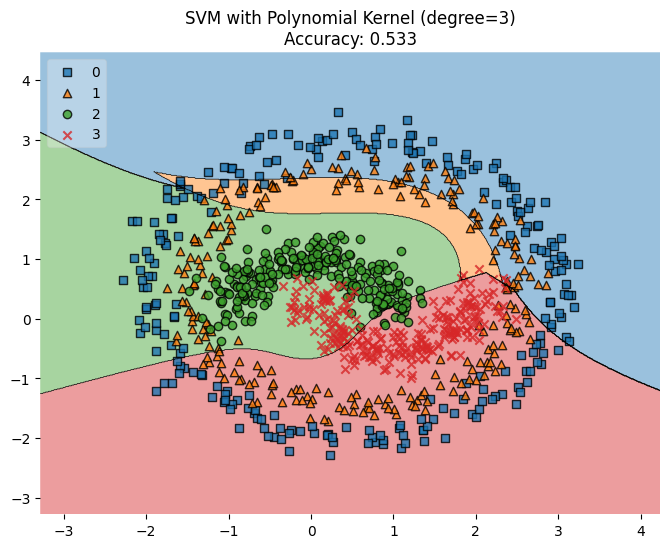

SVM with Polynomial Kernel: 0.533


/usr/local/lib/python3.12/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


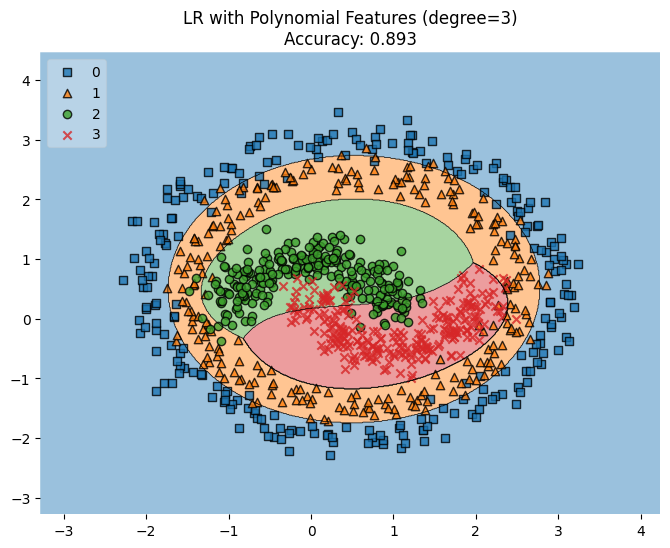

LR with Polynomial Features: 0.893


/usr/local/lib/python3.12/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


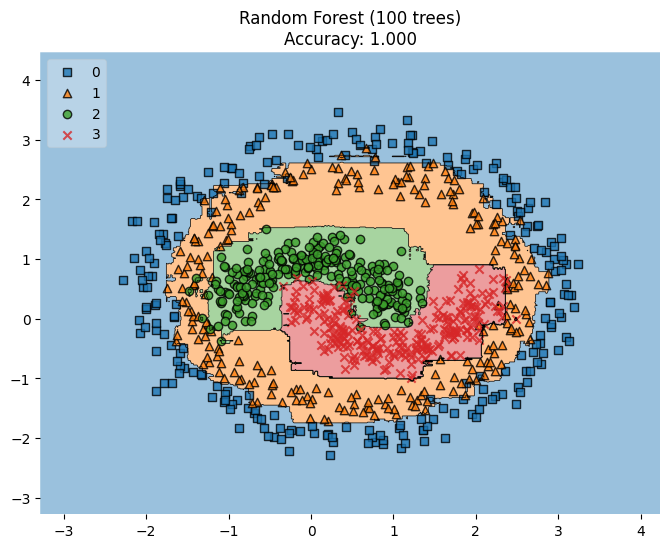

Random Forest: 1.000


/usr/local/lib/python3.12/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


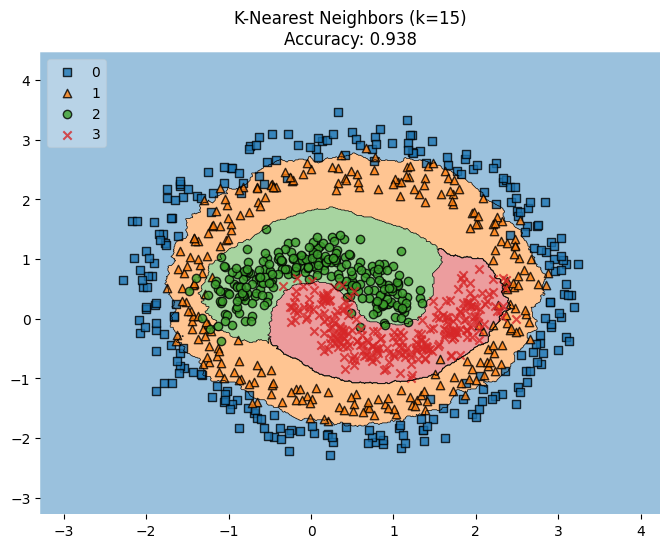

K-Nearest Neighbors: 0.938

COMPARISON OF MODELS:
SVM RBF: 0.934
SVM Poly: 0.533
LR + Poly: 0.893
Random Forest: 1.000
KNN: 0.938


In [12]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np

# Создаем набор данных
circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2))

# Функции для оценки и визуализации
def evaluate_model(X, y, estimator):
    y_pred = estimator.predict(X)
    return accuracy_score(y, y_pred)

def plot_decisions(X, y, estimator, title):
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X, y, clf=estimator, legend=2)
    plt.title(title)
    plt.show()

print("Testing models on complex dataset:")
print("=" * 50)

# 1. SVM с RBF ядром
svm_rbf = SVC(kernel='rbf', C=1.0, gamma=0.5, random_state=42)
svm_rbf.fit(points, labels)
acc_rbf = evaluate_model(points, labels, svm_rbf)
plot_decisions(points, labels, svm_rbf, f"SVM with RBF Kernel\nAccuracy: {acc_rbf:.3f}")
print(f"SVM with RBF Kernel: {acc_rbf:.3f}")

# 2. SVM с полиномиальным ядром
svm_poly = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', random_state=42)
svm_poly.fit(points, labels)
acc_poly = evaluate_model(points, labels, svm_poly)
plot_decisions(points, labels, svm_poly, f"SVM with Polynomial Kernel (degree=3)\nAccuracy: {acc_poly:.3f}")
print(f"SVM with Polynomial Kernel: {acc_poly:.3f}")

# 3. Logistic Regression с полиномиальными признаками
lr_poly = make_pipeline(
    PolynomialFeatures(3),
    StandardScaler(),
    LogisticRegression(C=1.0, random_state=42, max_iter=1000)
)
lr_poly.fit(points, labels)
acc_lr_poly = evaluate_model(points, labels, lr_poly)
plot_decisions(points, labels, lr_poly, f"LR with Polynomial Features (degree=3)\nAccuracy: {acc_lr_poly:.3f}")
print(f"LR with Polynomial Features: {acc_lr_poly:.3f}")

# 4. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(points, labels)
acc_rf = evaluate_model(points, labels, rf)
plot_decisions(points, labels, rf, f"Random Forest (100 trees)\nAccuracy: {acc_rf:.3f}")
print(f"Random Forest: {acc_rf:.3f}")

# 5. K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(points, labels)
acc_knn = evaluate_model(points, labels, knn)
plot_decisions(points, labels, knn, f"K-Nearest Neighbors (k=15)\nAccuracy: {acc_knn:.3f}")
print(f"K-Nearest Neighbors: {acc_knn:.3f}")

# Сравнительная таблица
print("\n" + "="*50)
print("COMPARISON OF MODELS:")
print("="*50)
models = {
    "SVM RBF": acc_rbf,
    "SVM Poly": acc_poly,
    "LR + Poly": acc_lr_poly,
    "Random Forest": acc_rf,
    "KNN": acc_knn
}
for model, accuracy in models.items():
    print(f"{model}: {accuracy:.3f}")